# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [1]:
# beer dataset
import pandas as pd
url = '../../assets/dataset/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


How would you cluster these beers?

In [2]:
# define X
X = beer.drop('name', axis=1)

In [3]:
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


Question: What happened to name? Why remove it ?

## Part 1: K-means clustering

In [4]:
# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [5]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int32)

In [6]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


What do the clusters seem to be based on? Why?

In [7]:
# review the cluster centers
print beer.columns
km.cluster_centers_

Index([u'name', u'calories', u'sodium', u'alcohol', u'cost', u'cluster'], dtype='object')


array([[ 150.        ,   17.        ,    4.52142857,    0.52071429],
       [ 102.75      ,   10.        ,    4.075     ,    0.44      ],
       [  70.        ,   10.5       ,    2.6       ,    0.42      ]])

In [8]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [9]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()

In [10]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [11]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])


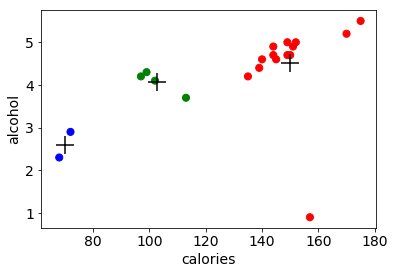

In [12]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

/Users/srikanajan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117edfa10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118792510>]], dtype=object)

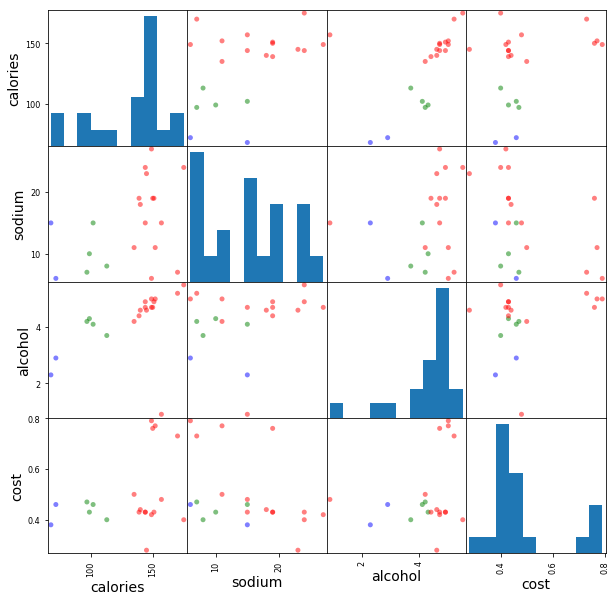

In [13]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[list(beer.cluster)], figsize=(10,10), s=100)

## Independent Practice
### Repeat the clustering with scaled data

Figure out how to Scale the data first and then do the clustering and scatter matrix again. What is your conclusion now as to what are these clusters? 

HINT:

```python  from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
```

In [ ]:
# center and scale the data


In [ ]:
# Check for std and mean to confirm the affect of the scaling


In [ ]:
# Now perform the KMeans clustering with 3 clusters
# Do your fitting here

# Show the labels and observe any insights on what makes a centroid


In [ ]:
# What do you observe in the clustering ? Note, you can sort by the label to bring rows with the same 
# clusters together


In [ ]:
# What are the means of each attribute for the centroids in each cluster? Do you see anything interesting?
# Do a scatter matrix plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

## This is to visualize the details behind the silhouette score. Modified from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


('For n_clusters =', 3, 'The average silhouette_score is :', 0.67317750464557957)


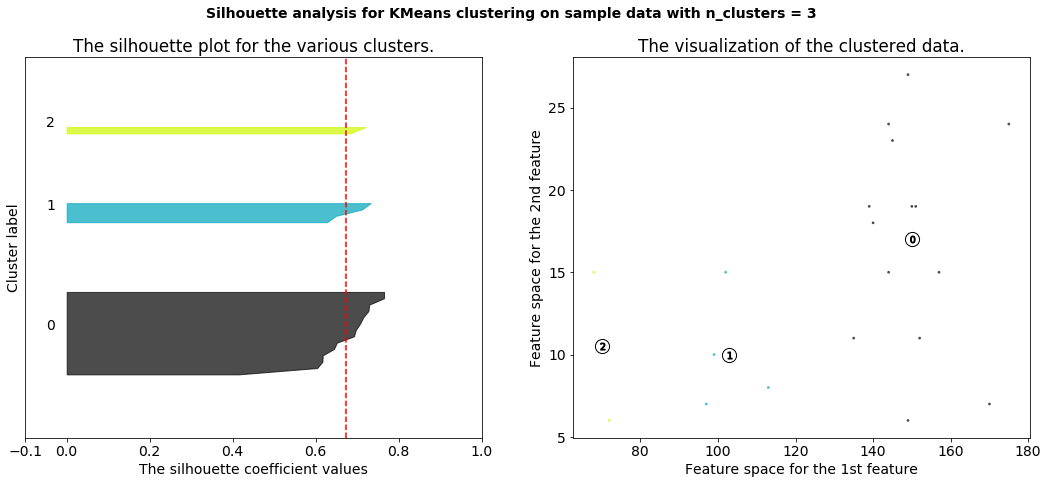

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

clusterer = km
n_clusters = len(np.unique(clusterer.labels_))
cluster_labels = clusterer.labels_
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X.values[:, 0], X.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

In [14]:
from sklearn import metrics
metrics.silhouette_score(X, km.labels_)

0.67317750464557957

In [15]:
# calculate SC for K=3

metrics.silhouette_score(X_scaled, km.labels_)

NameError: name 'X_scaled' is not defined

## Independent Practice
### Calculate the silhouette_score for k from 2 to 19 clusters and see how it changes

In [ ]:
# calculate SC for K=2 through K=19
# for k in k_range:
# ... FILL IN YOUR CODE HERE



### Plot out the sillouette scores by the number of clusters

In [ ]:
# plot the results


In [ ]:
# Perform K-means with the "optimal" number of clusters on scaled data. What do you observe from this k clustering?


## Part 3: DBSCAN clustering

In [ ]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

In [ ]:
# review the cluster labels
db.labels_

In [ ]:
# save the cluster labels and sort by cluster
beer['cluster'] = db.labels_
beer.sort_values('cluster')

In [ ]:
# review the cluster centers
beer.groupby('cluster').mean()

/Users/srikanajan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f0f5490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120942b90>]], dtype=object)

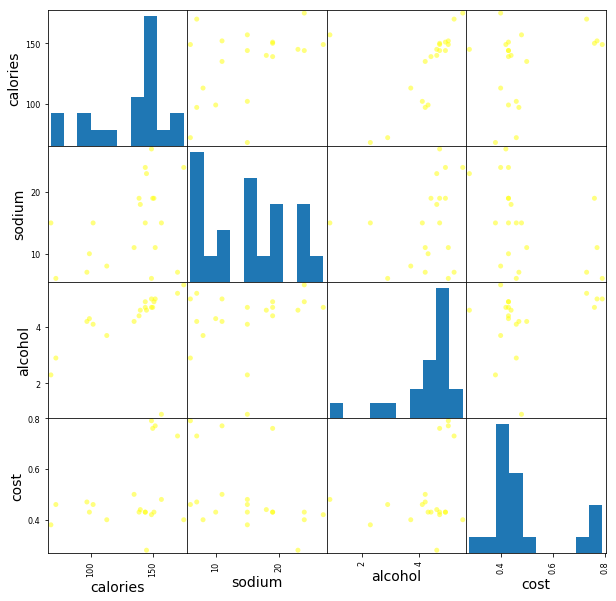

In [24]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[list(beer.cluster)], figsize=(10,10), s=100)

In [ ]:
# Silhousette Coefficient also works on DBSCAN
metrics.silhouette_score(X_scaled, db.labels_)

### Calculate silouhette scores for epsilon from 1 to 10 and plot the resulting number of clusters over K

In [ ]:
eps_range = np.linspace(1, 10,100)
scores = []


In [ ]:
# plot the results
plt.plot(eps_range, scores)
plt.xlabel('epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### BONUS: Try to plot silouhette coefficient vs. number of clusters instead (hint: num of clusters can be derived from the number of unique labels)